<a href="https://colab.research.google.com/github/YunHo0325/ai_lecture/blob/main/ans/ans1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras.backend as K
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)   # Tensorflow의 버전을 출력

2.12.0


# 1. MNIST 데이터셋 불러오기

In [ ]:
# MNIST 데이터를 로드
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train))  # x_train 배열의 크기를 출력

11490434/11490434 [==============================] - 2s 0us/step
60000


# 2. MNIST 데이터셋 출력

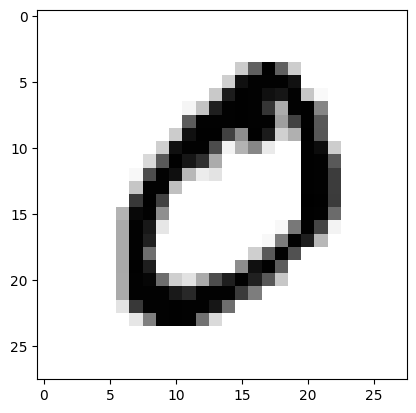

In [ ]:
# 2번째 이미지 출력
plt.imshow(x_train[1],cmap=plt.cm.binary) #[1]은 x_train의 2번째 이미지
plt.show()

In [ ]:
print(y_train[1]) #0 출력

0


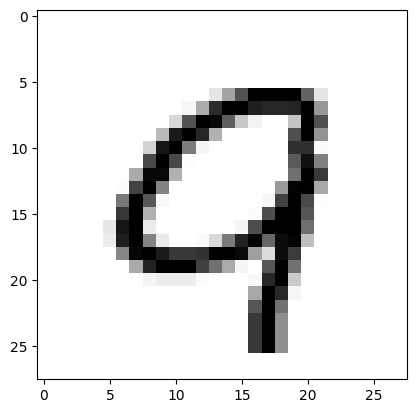

3001 번째 이미지의 숫자는 바로  9 입니다.


In [ ]:
# 특정 index의 이미지 출력
index=3000
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

# 3. MNIST 데이터셋 shape 확인

In [ ]:
# 데이터셋 shape 확인
x_train.shape

(60000, 28, 28)

In [ ]:
# 데이터셋 출력
x_train

In [ ]:
# 데이터셋 shape 변형
x_train.reshape(x_train.shape[0], -1)

In [ ]:
# 변형한 shape 확인
x_train.reshape(x_train.shape[0], -1).shape

In [ ]:
# label 별 개수 확인
for label in np.unique(y_train):
    print(f"[label {label}] train : {list(y_train).count(label)}, test : {list(y_test).count(label)}")

# 4. 로지스틱 회귀

In [ ]:
# 필요한 package import
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# 모델 학습을 위한 로지스틱 회귀 생성
model = LogisticRegression(max_iter=100)

In [ ]:
# 모델 학습
model.fit(x_train.reshape(x_train.shape[0], -1), y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# 테스트 데이터 예측
y_pred = model.predict(x_test.reshape(x_test.shape[0], -1))

In [ ]:
# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


# 5. 의사결정 트리

In [ ]:
# 필요한 package import
from sklearn import tree

In [ ]:
# 모델 학습을 위한 의사 결정 트리 생성
model = tree.DecisionTreeClassifier()

In [ ]:
# 모델 학습
model.fit(x_train.reshape(x_train.shape[0], -1), y_train)

DecisionTreeClassifier()

In [ ]:
# 테스트 데이터 예측
y_pred = model.predict(x_test.reshape(x_test.shape[0], -1))

In [ ]:
# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


# 6. 랜덤 포레스트

In [ ]:
# 필요한 package import
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 모델 학습을 위한 랜덤 포레스트 생성
model = RandomForestClassifier()

In [ ]:
# 모델 학습
model.fit(x_train.reshape(x_train.shape[0], -1), y_train)

RandomForestClassifier()

In [ ]:
# 테스트 데이터 예측
y_pred = model.predict(x_test.reshape(x_test.shape[0], -1))

In [ ]:
# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


# 7. DNN

## 7.1 epoch : 2

In [ ]:
# 모델 claer
K.clear_session()

In [ ]:
# 모델 정의
model=keras.Sequential([
        keras.layers.Dense(100, activation="sigmoid",input_shape=(784,), name='hidden'),
        keras.layers.Dense(10, activation="softmax",name="output")
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#학습 방법 지정
#optimizer: 어떻게 Gradient Descent를 할지 선택, loss 함수 & 평가방법 선택
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics="accuracy")

In [ ]:
#학습
model.fit(x_train.reshape(x_train.shape[0], -1),y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 13s 3ms/step - loss: 0.5523 - accuracy: 0.8517
Epoch 2/2
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3603 - accuracy: 0.8960


In [ ]:
#평가
print("model evaluate:")
model.evaluate(x_test.reshape(x_test.shape[0], -1),y_test)


 model evaluate:
313/313 [==============================] - 2s 4ms/step - loss: 0.3378 - accuracy: 0.9043


[0.3377879858016968, 0.9042999744415283]

## 7.2 epoch : 10

In [ ]:
# 모델 claer
K.clear_session()

In [ ]:
# 모델 정의
model=keras.Sequential([
        keras.layers.Dense(100, activation="sigmoid",input_shape=(784,), name='hidden'),
        keras.layers.Dense(10, activation="softmax",name="output")
    ]
)
model.summary()

#학습 방법 지정
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics="accuracy")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#학습
model.fit(x_train.reshape(x_train.shape[0], -1), y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5513 - accuracy: 0.8506
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3573 - accuracy: 0.8967
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3303 - accuracy: 0.9004
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3044 - accuracy: 0.9082
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2898 - accuracy: 0.9131
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2805 - accuracy: 0.9153
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2775 - accuracy: 0.9162
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2646 - accuracy: 0.9201
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2607 - accuracy: 0.9218
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.24

In [ ]:
# 평가
print("model evaluate:")
model.evaluate(x_test.reshape(x_test.shape[0], -1),y_test)

model evaluate:
313/313 [==============================] - 1s 3ms/step - loss: 0.2425 - accuracy: 0.9240


[0.2425001710653305, 0.9240000247955322]

# 8. CNN

## 8.1 epoch : 2

In [ ]:
# 모델 clear
K.clear_session()

In [ ]:
# 모델 정의
model= keras.Sequential()


model.add(keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [ ]:
#학습 방법 지정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
#학습
history = model.fit(x_train, y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 18s 5ms/step - loss: 0.5818 - accuracy: 0.8530
Epoch 2/2
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1538 - accuracy: 0.9547


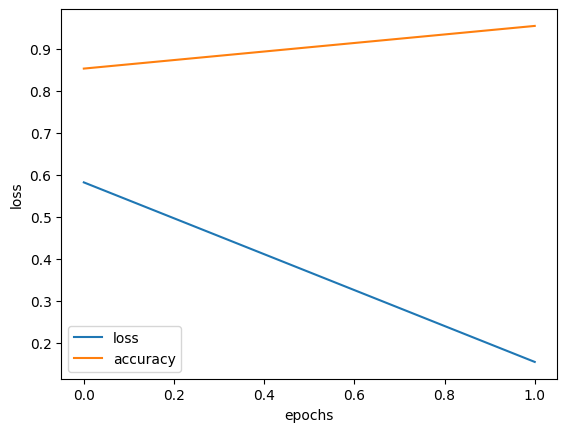

In [ ]:
# 학습 과정 그래프로 출력
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'accuracy'])

plt.show()

In [ ]:
# 평가
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0581 - accuracy: 0.9823


[0.058072272688150406, 0.9822999835014343]

## 8.2 epoch : 20

In [ ]:
# 모델 clear
K.clear_session()

In [ ]:
# 모델 정의
model= keras.Sequential()


model.add(keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

# 학습 방법 지정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [ ]:
#학습
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4094 - accuracy: 0.9082
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1198 - accuracy: 0.9660
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0916 - accuracy: 0.9736
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0791 - accuracy: 0.9765
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0641 - accuracy: 0.9808
Epoch 6/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0586 - accuracy: 0.9835
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0541 - accuracy: 0.9842
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0483 - accuracy: 0.9861
Epoch 9/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0472 - accuracy: 0.9860
Epoch 10/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0

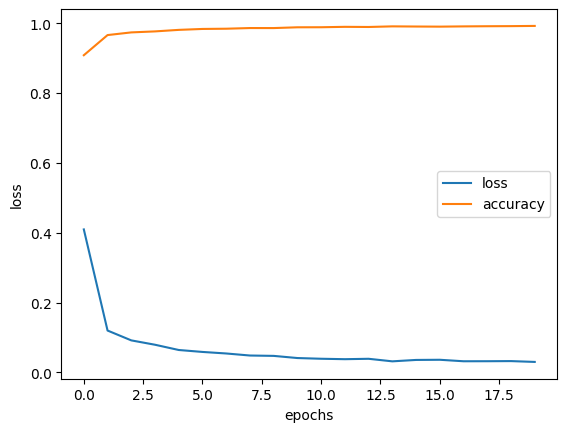

In [ ]:
# 학습 과정 그래프로 출력
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'accuracy'])

plt.show()

In [ ]:
# 평가
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0550 - accuracy: 0.9890


[0.054993342608213425, 0.9890000224113464]

# 9. 내 데이터로 예측

In [ ]:
# 필요한 package import
from PIL import Image

In [ ]:
# 그림판에서 붓으로 숫자를 그린 이미지 파일 가져오기
# 파일 열어서 L(256단계 흑백이미지)로 변환
img = Image.open("3.png").convert("L")

In [ ]:
# 이미지를 784개 흑백 픽셀로 사이즈 변환
img = np.resize(img, (1, 784))

In [ ]:
# 데이터를 모델에 적용할 수 있도록 가공
test_data = (((np.array(img) / 255) - 1) * -1)

In [ ]:
# 데이터 예측
res = model.predict(test_data)
print(res)

1/1 [==============================] - 0s 34ms/step
[[3.5558539e-08 2.9475119e-05 4.0058298e-05 9.9795246e-01 3.8657763e-07
  4.2394636e-04 1.8126978e-09 1.0554177e-03 4.1998759e-05 4.5607856e-04]]


In [ ]:
# 예측값 확인
print(np.argmax(res))

3
